In [1]:
import matplotlib.pyplot as plt
import numpy as np
import primes_list as pr_ls
from matplotlib import animation as a_nim
from IPython.display import HTML
import random as rd

In [2]:
class Draw_Anim:  
    def __init__(self, ls_p_var, v_spread, t_start, t_end, t_step, v_interval, v_frames):
        self.p_var_ls = ls_p_var
        self.t_spread = v_spread
        self.start_t = t_start
        self.end_t = t_end
        self.step_t = t_step
        self.interval_v = v_interval
        self.frames_v = v_frames
        self.fig, self.axes = plt.subplots()
        plt.xticks([])
        plt.yticks([])
        self.anim = a_nim.FuncAnimation(self.fig, self.animate, frames=v_frames, interval=v_interval)
    def animate(self, v_interval):
        self.t_var = np.linspace(self.start_t,self.end_t,self.step_t)
        self.x_var, self.y_var = [], []
        for set_pr in range(len(self.p_var_ls)):
            for len_x in range(len(self.t_var)):
                self.x_var += [self.complex_conjugate(False, v_interval, set_pr, len_x)]
                self.y_var += [self.complex_conjugate(True,  v_interval, set_pr, len_x)]
            self.x_var, self.y_var = np.array(self.x_var), np.array(self.y_var)
            self.sc_ax = self.axes.scatter(self.x_var, self.y_var, s=2, alpha=.75)
    def init_anim(self):
        print('(',self.p_var_ls,',',self.t_spread,',', self.start_t,',', self.end_t,',', self.step_t,',', self.interval_v,',', self.frames_v,')')
        return HTML(self.anim.to_jshtml())
    def save_anim(self, f_name='0'):
        self.anim.save('{}.gif'.format(f_name))
    def complex_conjugate(self, im_re, v_interval,  set_pr, len_x):
        c_e  = np.e                                # constant 
        c_pi = np.pi                               # c
        c_spread = self.t_spread                   # sub constant s_p  (effective magnitude ? 0.001 - 1000)
        v_linspace = self.t_var[len_x]             # sub variable f_x
        v_prime = pot[self.p_var_ls[set_pr]]       # sub variable p_r
        v_fxg = v_linspace - v_interval            # variable
        v_s_ls = v_linspace * len_x                # local extrema list of independent x var times its own index?
        pr_set_id_inv = 1/(set_pr+.3)               # homographic projection ?
        x_in = (v_prime * v_fxg) / (c_spread)      # t        
        f_xg =  c_e ** (-(4/2) * 1j * c_pi * x_in) #  FFT or DFT or something ?
        f_in = v_interval*(f_xg-v_prime)           # identity scale
        g_in = v_s_ls * v_fxg * pr_set_id_inv      # conjugate scale 
        if im_re == False:
            return (g_in * np.real(f_in*f_xg))
        elif im_re == True:
            return (g_in * np.imag(f_in*f_xg))

In [3]:
pot = pr_ls.primesofthousands
def rand_pr_i(min_r=0,max_r=25996):
    return rd.randrange(min_r,max_r)
def get_rand_ls(nr_entry_id=2, min_start_id=1, step_id=31, sort_ls = True):
    hot_ls = []
    for i in range(nr_entry_id):
        hot_ls += [rand_pr_i(min_start_id+(step_id*i), (min_start_id+step_id*(i+1)))]
    if sort_ls == True:
        hot_ls.sort()
        return hot_ls
    else:
        return hot_ls

( [237, 174] , 0.0001848 , -3.1415 , 3.1415 , 2000 , 125 , 25 )


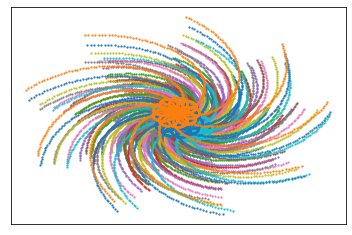

In [7]:
call_d_b = Draw_Anim( [237,174] , 0.0001848 , -3.1415 , 3.1415 , 2000 , 125 , 25 )
call_d_b.init_anim()

( [412, 367, 294, 143] , 0.0001848 , -3.1415 , 3.1415 , 2000 , 125 , 25 )


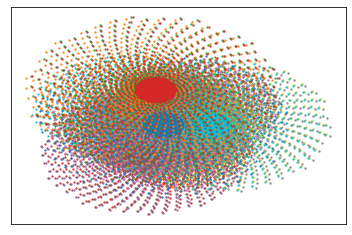

In [4]:
call_d_b = Draw_Anim( get_rand_ls(4,77,111)[::-1] , 0.0001848 , -3.1415 , 3.1415 , 2000 , 125 , 25 )
call_d_b.init_anim()

In [ ]:
call_d_b = Draw_Anim( [22, 17, 11] , 0.0004 , -6.2832 , 6.2832 , 1000 , 125 , 150 )
call_d_b.init_anim()

In [6]:
#call_d_b = Draw_Anim( [174, 237] , 0.0001848 , -3.1415 , 3.1415 , 2000 , 125 , 25 )nope 
#call_d_b = Draw_Anim( [237,174] , 0.0001848 , -3.1415 , 3.1415 , 2000 , 125 , 25 )yup

In [8]:
# call_d_b = Draw_Anim( [rand_pr_i()] ,round((np.e/1.68)/10000, 9) , -4 , 4 , 1000 , 75 , 75 ) # 7075
# call_d_b = Draw_Anim( [rand_pr_i()] ,round((np.e/1.68)/10000, 9) , -4 , 4 , 1000 , 75 , 75 ) # 18111
# call_d_b = Draw_Anim( [rand_pr_i()] ,.000406713 , -4 , 4 , 1000 , 75 , 75 ) # [14800]
# call_d_b = Draw_Anim( [rand_pr_i(),rand_pr_i()] ,round((np.e/1.68)/10000, 9) , -4 , 4 , 1000 , 75 , 25 ) # [9987, 24091]
#( [25223] , 0.000161802 , -4 , 4 , 1000 , 75 , 75 ) # round((np.e/1.68)/10000, 9)
#( [7075] , 0.000161802 , -4 , 4 , 1000 , 75 , 75 )
#( [1765] , 0.000161802 , -4 , 4 , 1000 , 75 , 75 )
#( [25124] , 4.6713e-06 , -4 , 4 , 1000 , 75 , 75 )
#( [25124] , 4.6713e-06 , -4 , 4 , 1000 , 75 , 75 )
#( [21134] , 0.00046713 , -4 , 4 , 1000 , 75 , 75 )
#r_ls = get_rand_ls(1, 10000, 200, True)
#call_d_b = Draw_Anim(r_ls,  0.0001084 , -4 , 4   , 1000 , 75 , 25) 10079
# pretty well made for 5 equations 

#( [11109, 12480, 14834, 17361, 19094] , 0.000184 , -1.5707963267948966 , 0.7853981633974483 , 1000 , 75 , 25 )
#call_d_b = Draw_Anim( [rand_pr_i(),rand_pr_i()] ,.000406713 , -4 , 4 , 1000 , 75 , 25 )
#call_d_b.init_anim()
#( [8, 20, 29] , 0.000184 , -1.5707963267948966 , 0.7853981633974483 , 1000 , 75 , 25 )
#round((np.pi/13.58)/1000,9) #(int(100000*(np.pi/rd.randrange(11,23))))/100000000

#( [25937, 25961, 25973, 25980] , 0.00017453 , -4 , 4 , 500 , 75 , 25 ) # interresting
#call_d_b = Draw_Anim( [37, 177] , 0.000184 , -np.pi , np.pi , 1000 , 75 , 25 )
#call_d_b = Draw_Anim( [25981, 25991] , 0.00184 , -3.141592653589793 , 3.141592653589793 , 1000 , 75 , 25 )
#call_d_b = Draw_Anim( [25749] , 0.00016534 , -3.141592653589793 , 3.141592653589793 , 2000 , 25 , 50 )
#call_d_b = Draw_Anim( [25749] , 0.00016534 , -3.141592653589793 , 3.141592653589793 , 2000 , 25 , 50 )
#call_d_b = Draw_Anim( [25993] , 0.000184 , -2 , 2 , 1000 , 75 , 25 )
#call_d_b.init_anim() ( [25421] , 0.000184 , -2 , 2 , 1000 , 75 , 25 )
#call_d_b = Draw_Anim( [25223] , 0.000184 , -4 , 4 , 1000 , 75 , 75 )
#call_d_b = Draw_Anim( [25996] , 0.000184 , -2 , 2 , 1000 , 75 , 75 ) # ray
#call_d_b = Draw_Anim( [25991] , 0.00018479 , 1 , 2 , 1000 , 75 , 75 ) # crisp
#call_d_b = Draw_Anim( [25988] , 0.00014279 , 1 , 2 , 1000 , 75 , 75 ) # crisp
#call_d_b = Draw_Anim( [25991] , 0.000184 , -2 , 2 , 1000 , 75 , 75 ) # whirl
#call_d_b = Draw_Anim(get_rand_ls(2, 1000, 10, True),  1014 , 1 , 2 , 2000 , 75 , 25)
#call_d_b = Draw_Anim(get_rand_ls(1, 1000, 10, True),  1010.0101 , 1 , 2 , 2000 , 75 , 25)
#call_d_b = Draw_Anim(get_rand_ls(1, 1000, 10, True),  1014 , 1 , 200 , 1000 , 75 , 25)
#original
#call_d_b = Draw_Anim( get_rand_ls(2,100, 100, True) , 0.00018479 , -np.pi ,  np.pi , 1000 , 75 , 25 )
#( [174, 237] , 0.00018479 , -3.141592653589793 , 3.141592653589793 , 1000 , 75 , 25 )